# **실습:CIFAR 데이터를 이용한 10개의 분류모델**

- 캐나다 고등 연구소(Canadian Institute for Advanced Research, CIFAR)에서 컴퓨터 비전 연구를 위해 만든 이미지 데이터셋의 이름 /  1번클래스 airplane ~ 9번 클래스 truck
    
    (참고) 인공신경망 학습용 데이터셋 [https://developer-together.tistory.com/49](https://www.google.com/url?q=https%3A%2F%2Fdeveloper-together.tistory.com%2F49)
    
- **CIFAR-10 으로 학습하면 정확한 성능 평가 및 비교 가능**
    
    CIFAR-10은 이미 많은 연구자가 사용하고 검증한 **표준 데이터셋**입니다. 따라서 자신이 만든 CNN 모델의 성능을 다른 모델과 객관적으로 비교하고, 결과를 **재현**하기 쉽습니다.
    
- **효율적인 학습과정도 장점임**
    - **간편한 전처리:** 이미지 크기(32x32), 채널, 클래스가 모두 통일되어 있어 복잡한 데이터 전처리 과정 없이 바로 모델 설계와 **하이퍼파라미터 튜닝**에 집중할 수 있음
    - **컴퓨팅 자원 절약:** 작은이미지로 학습 시간이 짧고, 고성능 GPU 없이도 효율적으로 학습 가능
    - **실용적인 학습 효과 :** CIFAR-10은 컴퓨터 비전의 기본 개념인 **이미지 분류**를 배우기에 매우 적합하며 CNN의 핵심구조(합성곱, 풀링 계층 등)가 어떻게 작동하는지 직관적으로 이해하는 데 도움이 됨

## **[추가실습]🧑‍🎓 CIFAR-10 CNN 모델 성능 향상**

CIFAR-10 데이터셋을 활용한 기본 CNN 모델에서,  **데이터 증강**과 **모델 구조 변경**을 통해 성능을 극대화

---

## [요구 사항 및 수행 단계]

<aside>

- 목표는 **테스트 정확도 75% 이상 달성**
- **전처리:** 모든 실험은 CIFAR-10의 표준 **정규화**를 포함해야 합니다.
    - transforms.Normalize
    (mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
- **Optimizer:** Adam 또는 SGD (Learning Rate를 잘 조정)
- **Epoch:** 20~50 Epoch를 권장합니다
</aside>

### 단계 1: 데이터 증강(Data Augmentation) 적용 (필수)

**목표:** 모델의 **일반화 성능**을 향상시키고 과적합을 줄입니다.

- **요구 사항:** torchvision.transforms (또는 v2)를 사용하여 훈련 데이터에 다음 기법들을 최소 3가지 이상 적용하고, 적용 전후의 검증 정확도와 과적합 정도를 비교 분석해야 합니다
    - **권장 기법:** RandomHorizontalFlip, RandomCrop, ColorJitter, RandomRotation 등.
- **제외 사항:** 테스트 데이터에는 증강을 적용하지 않아야 합니다 (정규화만 적용).

### 단계 2: 모델 깊이 및 구조 변경 (필수)

**목표:** 모델의 표현 능력(Capacity)을 향상시켜 더 복잡한 특징을 학습하도록 합니다.

- **요구 사항 (최소 2가지 이상 변경):**
    1. **깊이 증가:** 합성곱 계층(Conv Layer)을 **1~2개 추가**합니다.
    2. **너비 증가:** 합성곱 계층의 **채널 수** (예: 16, 32를 32, 64 등으로)를 늘립니다.
    3. **정규화/규제 추가:** 각 합성곱 계층 뒤에 배치 정규화(nn.BatchNorm2d) 또는 드롭아웃(nn.Dropout)을 추가합니다.

### 단계 3: 최종 보고 및 분석

- **비교:** 기본 모델 (Step 1 이전), 증강 적용 모델 (Step 1 완료), 최종 구조 변경 모델 (Step 2 완료)의 **훈련 손실, 검증 정확도, 테스트 정확도**를 표로 정리하여 기록합니다.
- **분석:** 각 변경 사항(증강, BN 추가, 깊이 증가)이 모델 성능에 미친 **영향과 그 이유**를 서술해야 합니다.
 (예: "BN 추가로 훈련 수렴 속도가 빨라졌습니다.", "증강 적용 후 훈련 손실과 검증 손실 간의 간격이 줄었습니다.")

### [1] GPU/CPU 장치 할당

In [11]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### [2] 데이터셋 다운로드 및 기본정보
- torch datasets에서
- 10개의 사물 분류 32*32*3 칼라 이미지 6만장# 새 섹션

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Cifar10 Transform 정의
# ----------------------------------------------------
transform = v2.Compose([
    v2.ToImage(),                # PIL / numpy → Image tensor
    v2.ToDtype(torch.float32, scale=True),  # 0~1 범위 실수화
])

# ----------------------------------------------------
#  Cifar10 데이터셋 로드
# ----------------------------------------------------
train_dataset = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

In [5]:
print(len(train_dataset))
print(train_dataset[0][0].shape)
print(train_dataset[0][0].min(), train_dataset[0][0].max())
print(train_dataset[0][1])

50000
torch.Size([3, 32, 32])
tensor(0.) tensor(1.)
6


In [6]:
classes =train_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']


샘플 이미지 5개 표시:


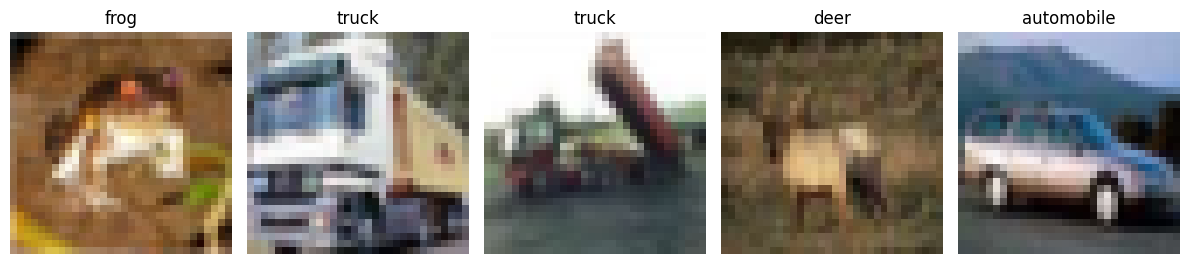

In [9]:
# 시각화 (옵션)

print("\n샘플 이미지 5개 표시:")
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    img, label = train_dataset[i]
    # Tensor를 이미지로 변환: (C, H, W) -> (H, W, C)
    img = img.permute(1, 2, 0)
    axes[i].imshow(img)
    axes[i].set_title(f'{classes[label]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### [3] 데이터로더기에 할당

In [13]:
# DataLoader 생성
batch_size = 32

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True,num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=2
)

print(len(train_loader))
print(train_loader.batch_size)
first_batch_data, first_batch_labels = next(iter(train_loader))
print(f"첫 배치 shape: {first_batch_data.shape}")  # [128, 3, 32, 32]
print(f"레이블 shape: {first_batch_labels.shape}")  # [128]

1563
32
첫 배치 shape: torch.Size([32, 3, 32, 32])
레이블 shape: torch.Size([32])


## [4]모델훈련

In [14]:
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 생성
model = BasicCNN()
model.to(device)
model

BasicCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [15]:
list(model.children())

[Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Linear(in_features=2048, out_features=128, bias=True),
 Linear(in_features=128, out_features=10, bias=True)]

In [16]:
# 파라미터 수
total_params = sum(p.numel() for p in model.parameters())
print(f"\n총 파라미터: {total_params:,}개")

for name, param in model.named_parameters():
    print(f"  {name}: {param.shape} = {param.numel():,}개")

# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("\n" + "=" * 60)
print("학습 (5 에폭만)")
print("=" * 60)


총 파라미터: 268,650개
  conv1.weight: torch.Size([16, 3, 3, 3]) = 432개
  conv1.bias: torch.Size([16]) = 16개
  conv2.weight: torch.Size([32, 16, 3, 3]) = 4,608개
  conv2.bias: torch.Size([32]) = 32개
  fc1.weight: torch.Size([128, 2048]) = 262,144개
  fc1.bias: torch.Size([128]) = 128개
  fc2.weight: torch.Size([10, 128]) = 1,280개
  fc2.bias: torch.Size([10]) = 10개

학습 (5 에폭만)


## [5] 모델학습
train데이터셋 활용

Epoch 1: Loss=1.498, Accuracy=52.6%
Epoch 2: Loss=1.165, Accuracy=61.8%
Epoch 3: Loss=1.013, Accuracy=63.2%
Epoch 4: Loss=0.912, Accuracy=65.3%
Epoch 5: Loss=0.834, Accuracy=66.1%
Epoch 6: Loss=0.773, Accuracy=66.3%
Epoch 7: Loss=0.713, Accuracy=67.3%
Epoch 8: Loss=0.655, Accuracy=67.5%
Epoch 9: Loss=0.607, Accuracy=68.7%
Epoch 10: Loss=0.563, Accuracy=67.2%

최종 정확도: 67.2%


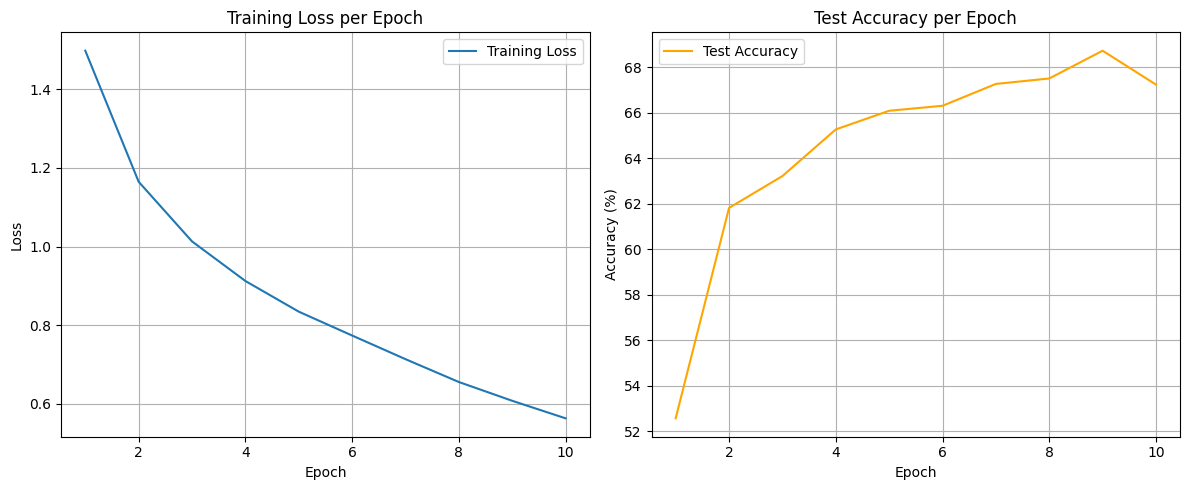

In [17]:
import matplotlib.pyplot as plt

# 학습 데이터 저장용 리스트
train_losses = []
test_accuracies = []
epochs = 10

for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Testing
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # 결과 저장
    train_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    train_losses.append(train_loss)
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}: Loss={train_loss:.3f}, Accuracy={accuracy:.1f}%')

print(f'\n최종 정확도: {accuracy:.1f}%')

# 차트 그리기
plt.figure(figsize=(12, 5))

# 훈련 손실 차트
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)

# 테스트 정확도 차트
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## [6] 추론은 직접 작성하세요